In [93]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import xarray as xr


In [94]:
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [95]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

grid = xr.open_dataset(grid_file)
flux = xr.open_dataset(flux_file)
fluxNoC = xr.open_dataset(fluxNoC_file)

In [96]:
adv_flux_AP = (flux.ADVyTr01[6:,:,227,:]-fluxNoC.ADVyTr01[6:,:,227,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr01[6:,:,227,:]-fluxNoC.DFyETr01[6:,:,227,:]).mean(dim='T')

Flux = adv_flux_AP + dif_flux_AP

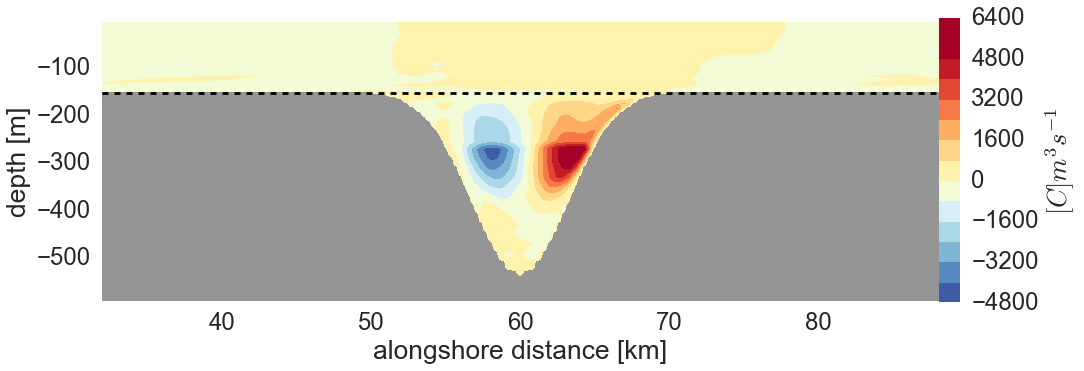

In [100]:
sns.set_context('poster', font_scale=1.5)
fig,ax = plt.subplots(1,1,figsize=(15,5))

cnt=ax.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
                Flux.isel(Zmd000090=slice(0,60),X=slice(60,300)),16,cmap='RdYlBu_r',vmax=5000, vmin=-5000)
ax.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
            grid.HFacC.isel(Z=slice(0,60),Y=227,X=slice(60,300)),[0,0.1])

cbar_ax = fig.add_axes([0.9, 0.12, 0.02, 0.79])
cb=fig.colorbar(cnt, cax=cbar_ax)
cb.set_label('$[C]m^3s^{-1}$')
ax.axhline(y=grid.Z[30], linestyle='--',color='k')

ax.set_xlabel('alongshore distance [km]')
ax.set_ylabel('depth [m]')

#plt.tight_layout()

fig.savefig('CSTrac_adv_mean.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


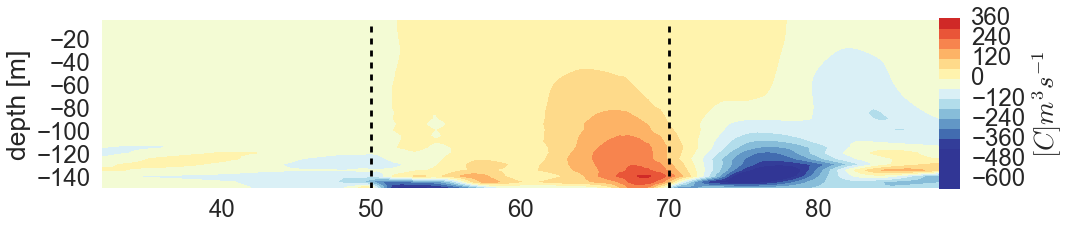

In [106]:
sns.set_context('poster', font_scale=1.5)
fig,ax = plt.subplots(1,1,figsize=(15,3))

cnt=ax.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,30)),
                Flux.isel(Zmd000090=slice(0,30),X=slice(60,300)),16,cmap='RdYlBu_r',vmax=400, vmin=-400)
ax.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,30)),
            grid.HFacC.isel(Z=slice(0,30),Y=227,X=slice(60,300)),[0,0.1])

cbar_ax = fig.add_axes([0.9, 0.12, 0.02, 0.79])
cb=fig.colorbar(cnt, cax=cbar_ax)
cb.set_label('$[C]m^3s^{-1}$')
ax.axvline(x=50, linestyle='--',color='k')
ax.axvline(x=70, linestyle='--',color='k')

ax.set_ylabel('depth [m]')

#plt.tight_layout()

fig.savefig('CSTrac_adv_mean_top150m.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


In [70]:
adv_fluxV_AP = (flux.ADVrTr01[6:,30,:,:]-fluxNoC.ADVrTr01[6:,30,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr01[6:,30,:,:]+flux.DFrETr01[6:,30,:,:]-
                (fluxNoC.DFrITr01[6:,30,:,:]+fluxNoC.DFrETr01[6:,30,:,:])).mean(dim='T')

FluxV = adv_fluxV_AP + dif_fluxV_AP

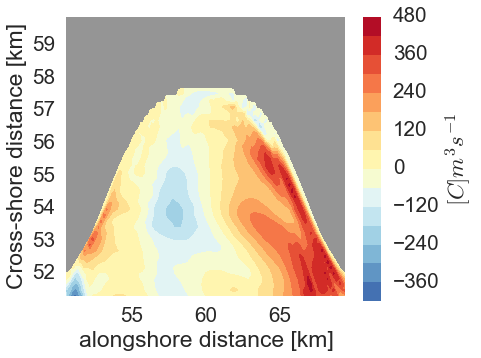

In [92]:
sns.set_context('poster', font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(5,5))

cnt=ax.contourf(grid.X.isel(X=slice(120,240))/1000,grid.Y.isel(Y=slice(225,270))/1000,
                   FluxV.isel(X=slice(120,240),Y=slice(225,270)),16,cmap='RdYlBu_r',vmax=480,vmin=-480)
ax.contourf(grid.X.isel(X=slice(120,240))/1000,grid.Y.isel(Y=slice(225,270))/1000,
            grid.HFacC.isel(Z=30,X=slice(120,240),Y=slice(225,270)),[0,0.1])

cbar_ax = fig.add_axes([0.95, 0.11, 0.05, 0.79])
cb=fig.colorbar(cnt, cax=cbar_ax)
cb.set_label('$[C]m^3s^{-1}$')

ax.set_xlabel('alongshore distance [km]')
ax.set_ylabel('Cross-shore distance [km]')

#plt.tight_layout()

fig.savefig('VertTrac_adv_mean.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


<xarray.DataArray (Y: 360, X: 360)>
array([[  2.68157572e-04,   3.07286769e-04,   3.16576421e-04, ...,
          3.31630319e-04,   2.69735232e-04,   2.49285862e-04],
       [  4.85467243e+00,   4.82728004e+00,   4.76924276e+00, ...,
          4.88624525e+00,   4.86814737e+00,   4.86567163e+00],
       [  4.78936577e+00,   4.75856972e+00,   4.72778511e+00, ...,
          4.84683752e+00,   4.84833527e+00,   4.82635117e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)
Coordinates:
  * Y          (Y) float64 218.6 655.7 1.092e+03 1.528e+03 1.962e+03 ...
  * X          (X) float64 314.9 944.3 1.573e+03 2.199e+03 2.823e+03 